# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [4]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [5]:
hospital_read_df.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


In [6]:
hospital_read_df[hospital_read_df['Number of Discharges'] == 'Not Available']

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
62,DOCTORS HOSPITAL AT DEER CREEK LLC,190297,LA,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.3287,6.2,4.7,NaN,07/01/2010,06/30/2013
92,PARK RIDGE HEALTH,340023,NC,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2941,5.7,4.4,NaN,07/01/2010,06/30/2013
94,MEADOWS REGIONAL MEDICAL CENTER,110128,GA,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2915,6.1,4.7,NaN,07/01/2010,06/30/2013
103,WHEATON FRANCISCAN HEALTHCARE ST FRANCIS,520078,WI,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2844,8.0,6.2,NaN,07/01/2010,06/30/2013
111,CARNEY HOSPITAL,220017,MA,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2782,7.3,5.7,NaN,07/01/2010,06/30/2013
117,ST ROSE HOSPITAL,50002,CA,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2748,7.1,5.6,NaN,07/01/2010,06/30/2013
134,MERCY FITZGERALD HOSPITAL,390156,PA,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2603,7.7,6.1,NaN,07/01/2010,06/30/2013
144,PINNACLE HOSPITAL,150166,IN,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2522,5.5,4.4,NaN,07/01/2010,06/30/2013
151,ALBERT EINSTEIN MEDICAL CENTER,390142,PA,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2499,6.7,5.4,NaN,07/01/2010,06/30/2013
174,COLQUITT REGIONAL MEDICAL CENTER,110105,GA,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2446,7.3,5.9,NaN,07/01/2010,06/30/2013


In [7]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\sanjay\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


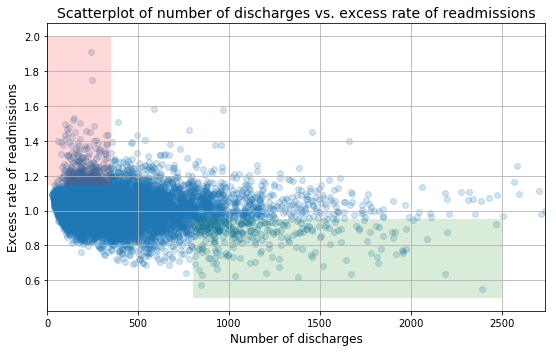

In [25]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

In [12]:
## H0: There is no change in the rate of readmissions with increasing number of discharges 
## Ha: There is significant change in the rate of readmissions with increasing number of discharges 

In [155]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

### Check if the following that is stated above is true:
#### 1.In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

In [126]:
##Create newdf by removing the missing values in Excess Readmission Ratio

newdf = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']][81:]

In [127]:
newdf.head()

,Number of Discharges,Excess Readmission Ratio
1832,25,1.0914
1699,27,1.0961
1774,28,1.0934
1853,29,1.0908
1290,30,1.1123


In [130]:
discharge_less_100 = newdf[newdf['Number of Discharges']<100]

In [133]:
discharge_less_100.describe()

,Number of Discharges,Excess Readmission Ratio
count,1188.000000,1188.000000
mean,74.717172,1.022618
std,16.908819,0.057979
min,25.000000,0.893500
25%,62.000000,0.984900
50%,77.000000,1.017750
75%,89.000000,1.052925
max,99.000000,1.495300


In [131]:
discharge_less_100['Excess Readmission Ratio'].mean()

1.0226183501683506

In [135]:
### So it is true that in hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023

In [134]:
len(discharge_less_100[discharge_less_100['Excess Readmission Ratio']>1])/len(discharge_less_100)

0.6321548821548821

In [136]:
## And it is true that 63% have excess readmission rate greater than 1, where number of discharges < 100

### 2. Check if the following that was stated above is true
#### In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [137]:
discharge_gt_1000 = newdf[newdf['Number of Discharges'] > 1000]

In [138]:
discharge_gt_1000.describe()

,Number of Discharges,Excess Readmission Ratio
count,463.000000,463.000000
mean,1383.427646,0.978335
std,459.109724,0.120007
min,1002.000000,0.549500
25%,1107.000000,0.907900
50%,1242.000000,0.986400
75%,1512.000000,1.057100
max,6793.000000,1.454300


In [140]:
## Mean of Excess Readmission Ratio is 0.978, is as stated above

In [141]:
len(discharge_gt_1000[discharge_gt_1000['Excess Readmission Ratio']>1])/len(discharge_gt_1000)

0.4449244060475162

In [142]:
## And it is true that 44% have excess readmission rate greater than 1, where number of discharges > 1000

#### 1. Setup an appropriate hypothesis test.
#### 2. Compute and report the observed significance value (or p-value).
#### 3. Report statistical significance for  αα  = .01.
#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
#### 5. Look at the scatterplot above.
#### 6. What are the advantages and disadvantages of using this plot to convey information?
#### 7. Construct another plot that conveys the same information in a more direct manner.

In [144]:
## H0: There is no change in the rate of readmissions with increasing number of discharges 
## Ha: There is significant change in the rate of readmissions with increasing number of discharges 

In [146]:
ERR_disc_L100 = discharge_less_100['Excess Readmission Ratio']

In [147]:
ERR_disc_G1000 = discharge_gt_1000['Excess Readmission Ratio']

In [148]:
ERR_disc_L100.shape

(1188,)

In [149]:
ERR_disc_G1000.shape

(463,)

In [150]:
two_sample = stats.ttest_ind(ERR_disc_L100, ERR_disc_G1000)
print("The t-statistic is %.3f and the p-value is %.3f." % two_sample)

The t-statistic is 10.061 and the p-value is 0.000.


In [151]:
# since p-value < 0.01, we reject the null hypothesis, and conclude that there is significant change 
# in rate of readmissions with increasing number of discharges

In [152]:
newdf.head()

,Number of Discharges,Excess Readmission Ratio
1832,25,1.0914
1699,27,1.0961
1774,28,1.0934
1853,29,1.0908
1290,30,1.1123


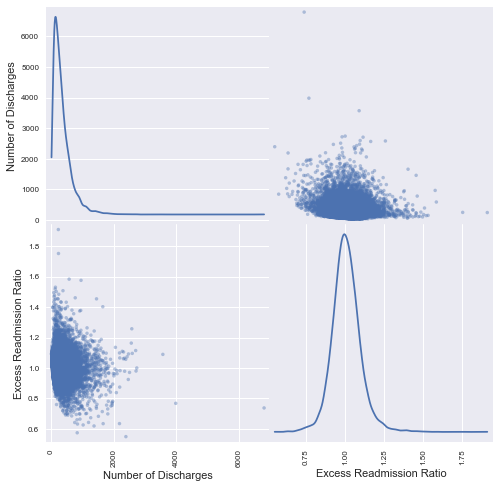

In [166]:
pd.plotting.scatter_matrix(newdf, alpha=0.4, figsize=[8,8],diagonal='kde');